In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, './module/')
from fintextmin import *  # 使用 modules 中的 fintextmin 模組

### 從指定路徑中讀入新聞資料

In [2]:
text_list = read_text_folder("./module/dataset/")
print("document number:", len(text_list))

document number: 11


### 製作詞頻矩陣
**下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的fintextmin函式**

In [3]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}
## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/g_/kbb1y2zd5rj27qqx5sxj2lr80000gn/T/jieba.cache
Loading model cost 0.828 seconds.
Prefix dict has been built succesfully.


In [4]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}

list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('防', 1),
 ('非洲', 2),
 ('豬瘟', 2),
 (' ', 2),
 ('陸', 1),
 ('港澳', 1),
 ('班機', 6),
 ('抵台', 1),
 ('出登', 1),
 ('機門', 1)]

In [5]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]

In [6]:
wfm = pd.concat(dwf_list, axis= 1)
wfm

/Users/xin/anaconda3/envs/visualize_class/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,0,0,0,0,0,0,0,0,0,0
,2.0,NaN,27.0,1.0,8.0,NaN,1.0,10.0,NaN,1.0,1.0
!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
(,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
),NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
",",NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0
.,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7.0,NaN,4.0,NaN
039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
1,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,3.0,NaN


In [7]:

wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

wfm # 詞頻矩陣完成

,,!,(,),",",-,.,039,0800,1,...,！,（,）,，,／,４,：,；,？,Ｅ
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,38.0,1.0,0.0,2.0,2.0,0.0,0.0
2,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,27.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,3.0,35.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0
7,10.0,0.0,1.0,1.0,0.0,0.0,7.0,0.0,0.0,1.0,...,3.0,4.0,4.0,66.0,0.0,1.0,0.0,2.0,12.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,3.0,...,4.0,4.0,4.0,38.0,1.0,0.0,1.0,4.0,0.0,0.0


In [8]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除 ## [使用 fintextmin 寫法]
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/Users/xin/anaconda3/envs/visualize_class/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,嚇人,62%,態勢,嘔吐,檢查,病例,肯亞,煮熟,立即,情不斷,...,一早,把,成長,西北部,殺豬,考慮,高溫,中國大陸,工作,指示
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 製作TF-IDF矩陣(sklearn)

**可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數**

In [9]:
'''
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)
'''

'\nfrom sklearn import feature_extraction\nfrom sklearn.feature_extraction.text import TfidfTransformer\n\n## [原生 python 寫法] \ntransformer = TfidfTransformer()\ntfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator\ndf_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)\ndf_tfidf\n\n## [使用 fintextmin 寫法]\n# df_tfidf = evaluate_tfidf(wfm)\n'

In [10]:
wfm

,嚇人,62%,態勢,嘔吐,檢查,病例,肯亞,煮熟,立即,情不斷,...,一早,把,成長,西北部,殺豬,考慮,高溫,中國大陸,工作,指示
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0



![](https://1.bp.blogspot.com/-tnzPA6dDtTU/Vw6EWm_PjCI/AAAAAAABDwI/JatHtUJb4fsce9E-Ns5t02_nakFtGrsugCLcB/s1600/%25E8%259E%25A2%25E5%25B9%2595%25E5%25BF%25AB%25E7%2585%25A7%2B2016-04-14%2B%25E4%25B8%258A%25E5%258D%25881.39.07.png)

In [21]:
wfm
N = len(text_list)
dfif = wfm > 0 #轉乘true false
df = dfif.sum(axis=0)

import math

out = N/df

logdf = [math.log10(i) for i in out.values]

In [23]:
df_tfidf = pd.DataFrame(wfm)

for i in range(1,N):
    df_tfidf[:i] = wfm[:i] * logdf
df_tfidf

,嚇人,62%,態勢,嘔吐,檢查,病例,肯亞,煮熟,立即,情不斷,...,一早,把,成長,西北部,殺豬,考慮,高溫,中國大陸,工作,指示
0,0.0,0.000000,0.000000,0.000000,3.376258,0.000000,0.000000,0.000000,3.376258,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.752517
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950642e-07,4.533725e-10,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,2.646967,2.646967,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,4.687432,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.305129e-08,0.000000
4,0.0,2.075207,2.075207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,2.075207,0.000000,0.000000e+00,7.435555e-07,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.83746,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.768652e-06,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,1.62695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
7,0.0,0.000000,0.000000,1.440558,0.000000,2.881116,1.440558,1.440558,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.267338,5.799527e-03,0.000000e+00,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.329380,0.000000e+00,0.000000e+00,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.796653e-01,0.000000e+00,0.000000


In [24]:
wfm

,嚇人,62%,態勢,嘔吐,檢查,病例,肯亞,煮熟,立即,情不斷,...,一早,把,成長,西北部,殺豬,考慮,高溫,中國大陸,工作,指示
0,0.0,0.000000,0.000000,0.000000,3.376258,0.000000,0.000000,0.000000,3.376258,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.752517
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950642e-07,4.533725e-10,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,2.646967,2.646967,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,4.687432,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.305129e-08,0.000000
4,0.0,2.075207,2.075207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,2.075207,0.000000,0.000000e+00,7.435555e-07,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.83746,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.768652e-06,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,1.62695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
7,0.0,0.000000,0.000000,1.440558,0.000000,2.881116,1.440558,1.440558,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.267338,5.799527e-03,0.000000e+00,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.329380,0.000000e+00,0.000000e+00,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.796653e-01,0.000000e+00,0.000000


In [18]:
df_tfidf['澳門']

0     4.500559
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: 澳門, dtype: float64

In [14]:

first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('嚇人', 0.0),
 ('62%', 0.0),
 ('態勢', 0.0),
 ('嘔吐', 0.0),
 ('檢查', 1.5001864145562545),
 ('病例', 0.0),
 ('肯亞', 0.0),
 ('煮熟', 0.0),
 ('立即', 1.5001864145562545),
 ('情不斷', 0.0)]

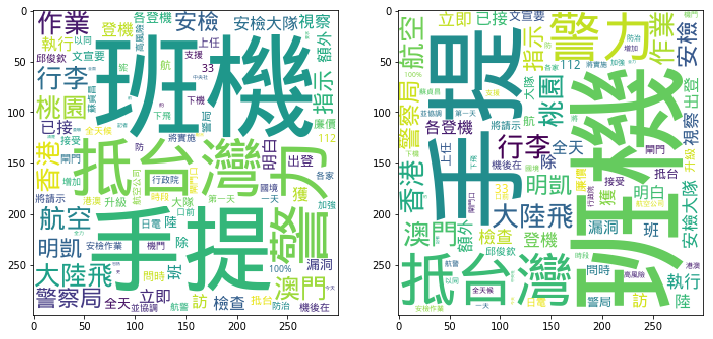

In [36]:
linux_font = r'./module/wqy-microhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

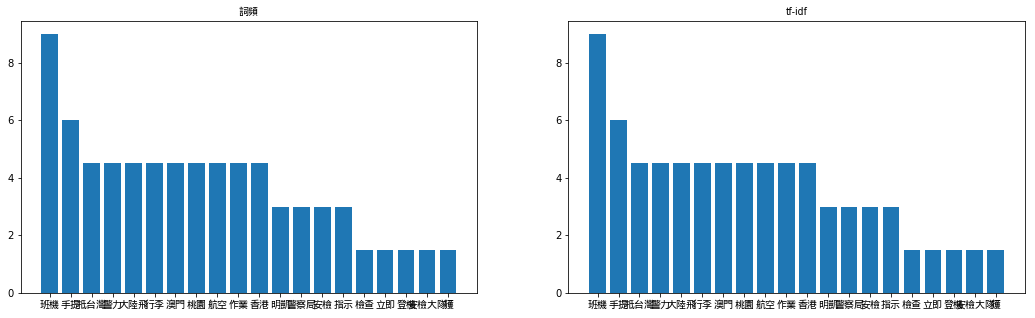

In [16]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")